In [1]:
# Library untuk manipulasi data & visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk dataset dan ML
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Statistik evaluasi
from scipy.stats import ttest_rel, wilcoxon

datasets = akses dataset NLP dari Hugging Face.

sklearn = untuk vectorisasi, training, evaluasi.

scipy.stats = analisis statistik hasil model.

In [2]:
# Load dataset SMS spam (ringan, hanya 5.5k data)
dataset = load_dataset("sms_spam", split="train")
df = pd.DataFrame(dataset)

# Rename kolom agar lebih familiar
df = df.rename(columns={'sms': 'text', 'label': 'label'})

# Cek 5 baris pertama
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [3]:
# Untuk mengetahui apakah data balanced
df["label"].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

In [4]:
# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

# TF-IDF Vectorizer: ubah teks jadi angka
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Prediksi
y_pred = model.predict(X_test_vec)

In [6]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.972
Precision: 0.992
Recall: 0.814
F1 Score: 0.894


Accuracy: seberapa banyak prediksi benar.

Precision: dari semua yang diprediksi spam, berapa yang benar-benar spam.

Recall: dari semua spam, berapa yang berhasil dideteksi.

F1 Score: gabungan harmonis precision dan recall (penting jika data imbalance).

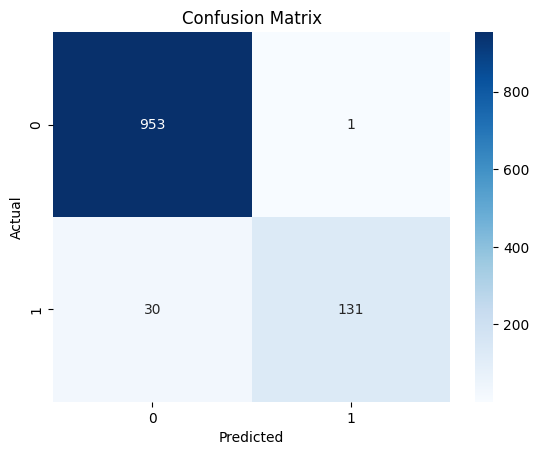

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Simulasi skor 5-fold cross-validation
model_a_scores = [0.85, 0.86, 0.84, 0.87, 0.85]
model_b_scores = [0.82, 0.80, 0.83, 0.81, 0.82]

# Paired t-test
t_stat, p_val = ttest_rel(model_a_scores, model_b_scores)
print(f"Paired t-test p-value: {p_val:.4f}")

# Wilcoxon test
w_stat, p_val_w = wilcoxon(model_a_scores, model_b_scores)
print(f"Wilcoxon test p-value: {p_val_w:.4f}")

Paired t-test p-value: 0.0173
Wilcoxon test p-value: 0.0625


p-value < 0.05 → beda model signifikan.

t-test: asumsi distribusi normal.

Wilcoxon: non-parametrik (jika data tidak normal).

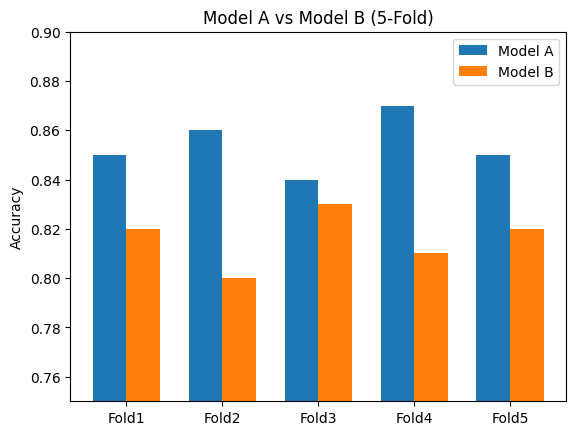

In [9]:
labels = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']
x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, model_a_scores, width, label='Model A')
plt.bar(x + width/2, model_b_scores, width, label='Model B')
plt.ylabel('Accuracy')
plt.title('Model A vs Model B (5-Fold)')
plt.xticks(x, labels)
plt.ylim(0.75, 0.9)
plt.legend()
plt.show()